In [2]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('..')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']

In [3]:
# trk and jet pt bins
trk_pt_lo = [0, 1, 2, 5]
trk_pt_hi = [1, 2, 5, 20]

jet_pt_lo = [5, 10, 20]
jet_pt_hi = [10, 20, 40]
jet_pt_sel = 1


In [4]:
# file defs

base_dir = "/global/cfs/cdirs/alice/kdevero/"
#fs = [base_dir+"pp_jet-trk/19012324/merged.root"]#, "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
fs = ["./pythia/pt5_R0p4_s5p02.root", base_dir+"pp_jet-trk/19162010/merged.root"] #, "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
#fs = ["./output_data/AnalysisResults.root"]
f_names = ["pythia pp", "ALICE pp", "Pb+Pb, 0-5%", "Pb+Pb, 40-50%"]

n_jetpt = "h_jet_pt_JetPt_R0.4_0.15"
n_shape_pt = "h_jet-trk_shape_RL_TrkPt_JetPt_R0.4_0.15"
n_shape_z = "h_jet-trk_shape_RL_z_JetPt_R0.4_0.15"
n_ptprofile_pt = "h_jet-trk_ptprofile_RL_TrkPt_JetPt_R0.4_0.15"
n_ptprofile_z = "h_jet-trk_ptprofile_RL_z_JetPt_R0.4_0.15"


Njets : 70205.0
201
50
51
Njets : 6623.0
201
50
51
Njets : 517.0
201
50
51
Njets : 114887.0
201
Njets : 10579.0
201
Njets : 821.0
201


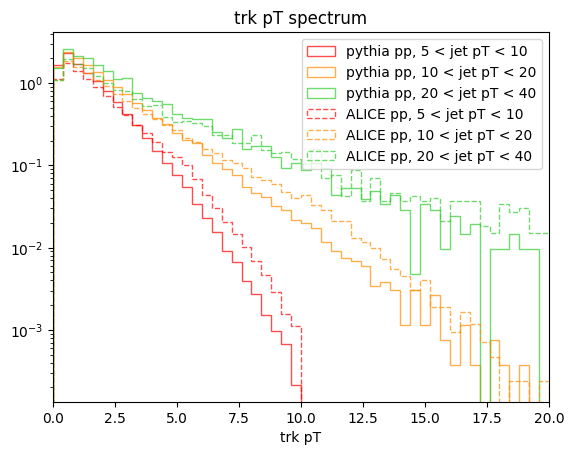

In [5]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    N_jets_pt = []
    for jetpti in range(len(jet_pt_lo)):
        h = f[n_jetpt]
        h_jetpt = h.to_numpy()[0]
        pt_range = (findbin(h.axis("x"), jet_pt_lo[jetpti]), findbin(h.axis("x"), jet_pt_hi[jetpti]))
        h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
        N_jets = np.sum(h_jetpt)
        print("Njets : " + str(N_jets))

        h = f[n_shape_pt]
        bin_edges = h.axis("y").edges()
        bin_width = bin_edges[1] - bin_edges[0]
        
        h_numpy = h.to_numpy()[0]
        pt_range = (findbin(h.axis("z"), jet_pt_lo[jetpti]), findbin(h.axis("z"), jet_pt_hi[jetpti]))
        h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
        this_slice = projectionY(h_numpy)
        this_slice = this_slice / (bin_width * N_jets)
        
        print(len(bin_edges))
        
        if fi == 0:
            this_slice, bin_edges = rebin(this_slice, bin_edges, 4)
            print(len(this_slice))
            print(len(bin_edges))
            
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[jetpti], label='{}, {} < jet pT < {}'.format(f_names[fi], jet_pt_lo[jetpti], jet_pt_hi[jetpti]))

plt.legend()
plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
#plt.ylim(1E-1, 1E2)
#plt.xscale('log')
plt.yscale('log')
plt.show()


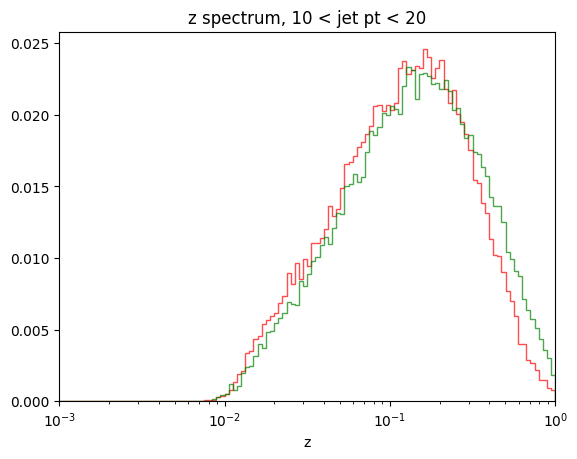

In [6]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("y").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
    this_slice = projectionY(h_numpy)
    this_slice = this_slice / np.sum(this_slice)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
    plt.title("z spectrum, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel]) )
    plt.xlabel('z')
    plt.xlim(1e-3, 1)
    plt.xscale('log')
    #plt.yscale('log')
plt.show()
    

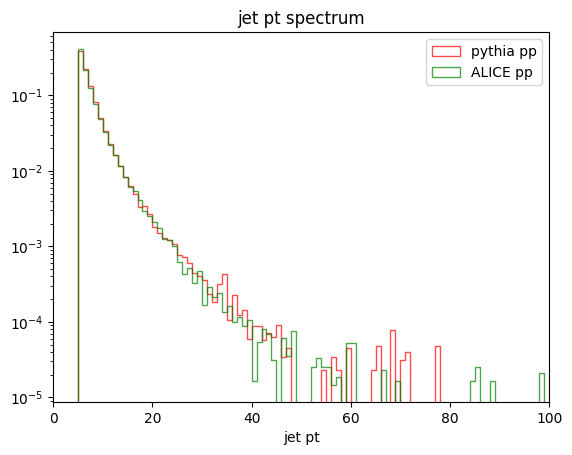

In [7]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("z").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionZ(h_numpy)
    this_slice = this_slice / np.sum(this_slice)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
    plt.title("jet pt spectrum") 
    plt.xlabel('jet pt')
    plt.legend(loc="upper right")
    plt.xlim(0, 100)
    #plt.xscale('log')
    plt.yscale('log')
plt.show()
    

In [15]:
h_jetpt = []
h_shape_pt = []
h_shape_pt_np = []
h_shape_z = []
h_shape_z_pt = []
h_ptprofile_pt = []
h_ptprofile_pt_np = []
N_jets = []

for fi in range(len(fs)):
    f = ur.open(fs[fi])

    # jet pt histogram
    h = f[n_jetpt]
    pt_range = (findbin(h.axis("x"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("x"), jet_pt_hi[jet_pt_sel]))
    print(pt_range)
    
    h = h.to_numpy()[0]
    h = h[pt_range[0]:pt_range[1]]
    h_jetpt.append(h)
    print("Njets : " + str(np.sum(h)))
    N_jets.append(np.sum(h))

    # R, trk pt, jet pt histogram
    h = f[n_shape_pt]
    h_shape_pt.append(h)
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))

    h = h.to_numpy()[0]
    h_shape_pt_np.append(zslice(h,pt_range[0],pt_range[1]))
    
    # same as above, but pt weighted
    h = f[n_ptprofile_pt]
    h_ptprofile_pt.append(h)
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))

    h = h.to_numpy()[0]
    h_ptprofile_pt_np.append(zslice(h,pt_range[0],pt_range[1]))

    # R, trk pt, jet pt histogram
    # TODO


(10, 20)
Njets : 6623.0
(10, 20)
Njets : 10579.0


(0, 10)
13451.0
(10, 20)
10580.0
(20, 50)
12214.0
(50, 200)
3294.0
(0, 2)
12461.0
(2, 5)
16902.0
(5, 12)
16316.0
(12, 50)
7582.0


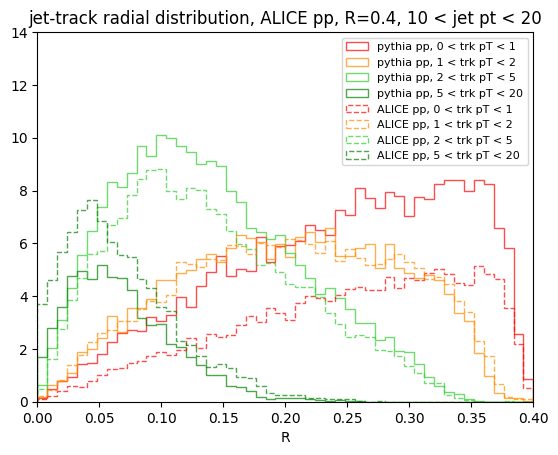

In [9]:
for fi in range(len(fs)):
    bin_edges = h_shape_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h_shape_pt_np[fi]
    
    h_trk = []
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[i]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)

        this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
        print(np.sum(this_slice))
        this_slice = this_slice / (N_jets[fi] * bin_width)

        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[i], trk_pt_hi[i]))
        h_trk.append(this_slice)

plt.legend(loc='upper right', prop={'size': 8})
plt.title("jet-track radial distribution, " + f_names[fi] + ", R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 14)
#plt.ylim(0, 0.5)
plt.show()


[    0.          1101.80172155  2778.59370985  4956.98914993
  7753.5072025  10908.35571947 14097.72524739 17643.2530062
 21136.54391015 24482.53972907 27859.67228044 31058.20089978
 34096.44906207 37283.47815929 40199.17056412 43010.40542216
 45645.46129134 48161.31372663 50608.51740894 52976.91492435
 55082.98425616 57118.35529222 58915.97819199 60660.39476709
 62250.3473617  63908.53282538 65425.74485581 66932.84625262
 68356.85149863 69643.58823049 70982.91380814 72239.78896615
 73381.71270272 74499.02229529 75588.28999297 76520.11315204
 77544.32831847 78417.28027715 79245.29348289 80023.5886274
 80724.75015729 81376.06599505 81961.87816376 82463.95068323
 82919.6603656  83287.2534538  83587.56157081 83781.42816362
 83912.68220836]
[     0.           3508.00252517   7549.79100354  12555.15128061
  18301.06063987  24565.28841509  31239.25815579  37476.22988074
  43348.34086019  48965.83823602  54725.04409491  60162.34254032
  65460.29699504  70325.82496791  74848.12906861  78832.67

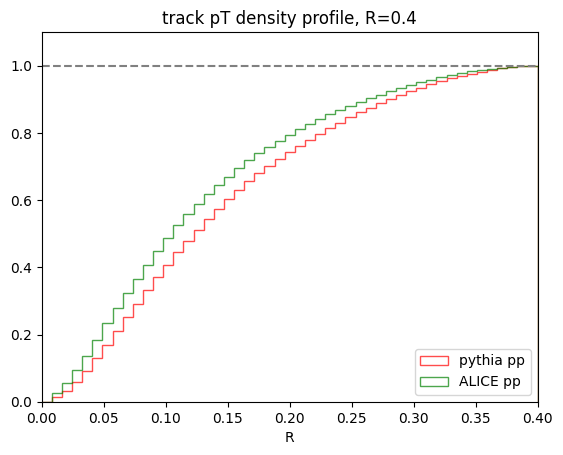

In [16]:
hs = []
for i in range(len(fs)):
    f = ur.open(fs[i])
    h = f[n_ptprofile_pt]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = projectionX(zslice(h_numpy, pt_range[0], pt_range[1]))

    n_r_bins = 50
    bin_edges = np.linspace(0, 0.4, n_r_bins)
    bin_widths = 0.4 / n_r_bins
    
    h_to_graph = np.array([np.sum(h_numpy[0:findbin(h.axis("x"), bin_edges[i])]) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    hs.append(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i])
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()


(0, 10)
(10, 20)
(20, 50)
(50, 200)
(0, 2)
(2, 5)
(5, 12)
(12, 50)


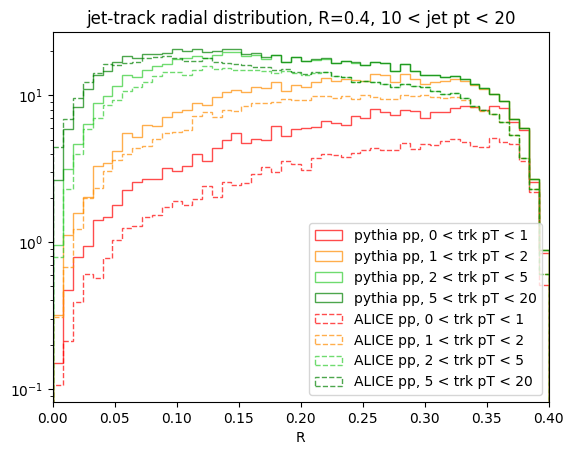

In [19]:
for fi in range(len(fs)):
    
    bin_edges = h_shape_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    hnumpy = h_shape_pt_np[fi]
    
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[i]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)
        
        this_slice = yslice(hnumpy, 0, trk_pt_range[1])
        this_slice = this_slice / (N_jets[fi] * bin_width)
        
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[i], trk_pt_hi[i]))
    
plt.legend(loc='lower right')
plt.title("jet-track radial distribution, R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e0, 3e3)
plt.show()

(0, 10)
(10, 20)
(20, 50)
(50, 200)
(0, 2)
(2, 5)
(5, 12)
(12, 50)


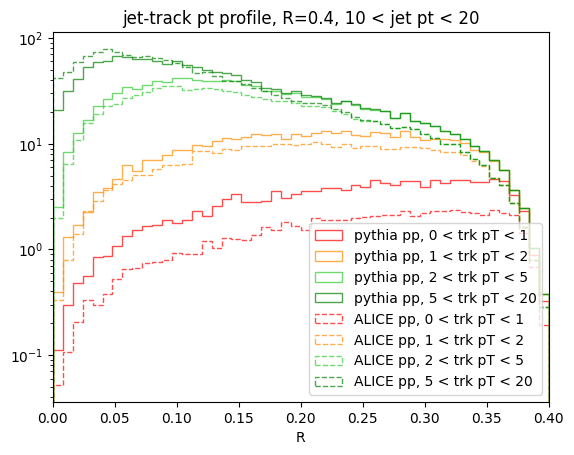

In [20]:
for fi in range(len(fs)):
    
    bin_edges = h_ptprofile_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    hnumpy = h_ptprofile_pt_np[fi]
    
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[i]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)
        
        this_slice = yslice(hnumpy, 0, trk_pt_range[1])
        this_slice = this_slice / (N_jets[fi] * bin_width)
        
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[i], trk_pt_hi[i]))
    
plt.legend(loc='lower right')
plt.title("jet-track pt profile, R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e0, 3e3)
plt.show()